# LONDON CRIME

# 1. Import Library yang dibutuhkan

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import folium

%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud

# 2. Load and Review Data

Pada langkah ini kita akan mencoba membaca dataset dalam bentuk dataframe. Dataset akan ditampilkan dengan baris-baris teratas dengan method .head() dan .tail() untuk melihat baris-baris terbawah dari dataset. 

In [2]:
# Read dataset as dataframe
df = pd.read_csv("dataset\london_crime_by_lsoa.csv")
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Selain itu dengan menggunakan method .info() akan dilihat sedikit informasi mengenai data, seperti columns yang terdapat pada data, tipe data untuk setiap column, dan jumlah baris.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
df.shape

(13490604, 7)

Method .shape hampir memiliki tujuan yang sama dengan method .info(), hanya saja dengan .shape kita akan melihat bentuk representasi dari data secara general. Seperti contoh diatas, untuk dataset kita memiliki 13490604 baris dan 7 kolom. 

# 3. Data Cleaning

In [6]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Berdasarkan proses cleaning diatas, dataset sudah cukup bersih karena tidak ada nilai NaN. Sehingga tidak perlu tindakan lebih lanjut yang diperlukan untuk data cleaning.

In [7]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Method .desribe() digunakan untuk melihat informasi statistik dari setiap column yang bertipe numeric. 

# 4. Data filtering

Pada data filtering ini, kita akan mencoba untuk melakukan modifikasi seperti pengubahan nama column agar lebih mudah dipahami, lalu menghapus column yang sekiranya tidak terlalu penting dalam proses pengolahan data nantinya, dll. 

In [8]:
# We are going to rename borough with area
df.rename(columns={"borough": "area"}, inplace=True)
df.columns

Index(['lsoa_code', 'area', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [9]:
# We are going to rename value with total
df.rename(columns={"value": "total"}, inplace=True)
df.columns

Index(['lsoa_code', 'area', 'major_category', 'minor_category', 'total',
       'year', 'month'],
      dtype='object')

In [10]:
df.drop(['lsoa_code'], axis=1, inplace=True)

In [11]:
# and read the df 
df.head()

,area,major_category,minor_category,total,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


Saat dataset dibaca kembali, maka perubahan yang dilakukan tadi telah tersimpan, seperi pengubahan nama column borough dan value menjadi area dan total, lalu penghapusan column lsoa_code karena dinilai tidak terlalu memiliki pengaruh yang besar saat proses visualisasi data nanti.

Lalu terdapat method .value_counts() yang berfungsi untuk menghitung nilai masing-masing item yang terdapat dalam setiap column categorical. Seperti column area yang menampung nama-nama kota/area yang terdapat di Inggris, sehingga dengan menggunakan method value_counts() akan dihitung berapa kali kejahatan yang terjadi di masing-masing kota/area.

In [12]:
df.area.value_counts()
# kota terbanyak terjadi kejahatan adalah Croydon

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [13]:
# menghitung jenis kejatahatan yg high level
df.major_category.value_counts()
# kejahatan high level terbanyak adalah Theft and Handling

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

Sedangkan Theft and Handling adalah jenis major_category crime yang paling sering terjadi. 

In [14]:
df.minor_category.value_counts()

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

Untuk crime minor_category yang paling sering terjadi ialah Common Assault.

In [15]:
df.year.value_counts()

2016    1498956
2015    1498956
2008    1498956
2012    1498956
2010    1498956
2013    1498956
2014    1498956
2011    1498956
2009    1498956
Name: year, dtype: int64

Selanjutnya kita akan memberikan sedikit simple query pada dataset kita untuk melihat data kejahatan berjenis Theft and Handling di kota Croydon. Hasil menunjukkan bahwa terdapat 176256 kejahatan Theft and Handling yang terjadi di Kota Croydon.

In [16]:
# kita coba untuk melihat jumlah dri jenis kejatahan Theft and Handling di Kota Greenwich
df[(df['area'] == 'Croydon') & (df['major_category'] == 'Theft and Handling')]

,area,major_category,minor_category,total,year,month
43,Croydon,Theft and Handling,Other Theft,1,2014,5
139,Croydon,Theft and Handling,Motor Vehicle Interference & Tampering,0,2016,3
149,Croydon,Theft and Handling,Other Theft Person,0,2015,3
175,Croydon,Theft and Handling,Theft From Motor Vehicle,9,2012,4
223,Croydon,Theft and Handling,Motor Vehicle Interference & Tampering,0,2011,3
...,...,...,...,...,...,...
13490278,Croydon,Theft and Handling,Theft From Motor Vehicle,2,2013,1
13490281,Croydon,Theft and Handling,Theft/Taking of Pedal Cycle,0,2015,9
13490437,Croydon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2009,3
13490493,Croydon,Theft and Handling,Other Theft Person,0,2014,2


# 5. Data Visualization

Pada data visualization, kita akan mencoba beberapa jenis visualisasi seperti Area plot, line plot, bar plot, dll. Untuk memudahkan proses tersebut, kita akan membuat sebuah variabel baru bernama major_crime yang akan menampung hasil grouping setiap jenis major_category beserta jumlahnya per tahun. Untuk tahunnya dipilih >= 2012 karena diyakini terjadinya peningkatan kasus kriminal di Inggris pada tahun 2012 ke atas. 

In [55]:
major_crime = df[(df['year'] >= 2012)].groupby(['major_category','year'])['total'].sum()
major_crime

major_category               year
Burglary                     2012     93392
                             2013     87222
                             2014     76053
                             2015     70489
                             2016     68285
Criminal Damage              2012     62158
                             2013     56206
                             2014     59279
                             2015     62976
                             2016     64071
Drugs                        2012     51776
                             2013     50278
                             2014     44435
                             2015     39785
                             2016     38914
Fraud or Forgery             2012         0
                             2013         0
                             2014         0
                             2015         0
                             2016         0
Other Notifiable Offences    2012     10675
                             2013     1081

Kita akan mencoba untuk melihat jenis major_category 5 tertinggi. Hasil menunjukkan terdapat Theft Handling, Violence Against the Person, Criminal Damage, Drugs, dan Burglary. Lalu akan dilakukan pengelompokkan lebih lanjut untuk setiap jenis major_category beserta jumlah kejahatan yang terjadi per tahunnya.

In [59]:
df['major_category'].value_counts().head(5)

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Name: major_category, dtype: int64

In [19]:
thefthand = major_crime['Theft and Handling']
df_thefthand = thefthand.to_frame()
df_thefthand.rename(columns={'total':'Theft and Handling'}, inplace = True)
df_thefthand

,Theft and Handling
year,
2012,334054
2013,306372
2014,279880
2015,284022
2016,294133


In [20]:
violence = major_crime['Violence Against the Person']
df_violence = violence.to_frame()
df_violence.rename(columns={'total':'Violence Against the Person'}, inplace = True)
df_violence

,Violence Against the Person
year,
2012,150014
2013,146181
2014,185349
2015,218740
2016,232381


In [21]:
crimdamage = major_crime['Criminal Damage']
df_crimdamage = crimdamage.to_frame()
df_crimdamage.rename(columns={'total':'Criminal Damage'}, inplace = True)
df_crimdamage

,Criminal Damage
year,
2012,62158
2013,56206
2014,59279
2015,62976
2016,64071


In [22]:
drugs = major_crime['Drugs']
df_drugs = drugs.to_frame()
df_drugs.rename(columns={'total':'Drugs'}, inplace = True)
df_drugs

,Drugs
year,
2012,51776
2013,50278
2014,44435
2015,39785
2016,38914


In [23]:
burglary = major_crime['Burglary']
df_burglary = burglary.to_frame()
df_burglary.rename(columns={'total':'Burglary'}, inplace = True)
df_burglary

,Burglary
year,
2012,93392
2013,87222
2014,76053
2015,70489
2016,68285


Setelahnya, hasil pengelompokkan tadi akan diassign dalam suatu dataframe baru, sehingga ketika dataframe dibaca akan menampilkan jenis major_crime beserta jumlah kejahatannya yang terjadi per tahunnya.

In [63]:
# setelah ditambahkan axis=1
# axis =1 berguna untuk mengitung larik sepanjang kolom

df5 = pd.concat([df_thefthand, df_violence,df_crimdamage,
                 df_drugs, df_burglary], axis=1)
df5

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
year,,,,,
2012,334054,150014,62158,51776,93392
2013,306372,146181,56206,50278,87222
2014,279880,185349,59279,44435,76053
2015,284022,218740,62976,39785,70489
2016,294133,232381,64071,38914,68285


# a. Area Plot

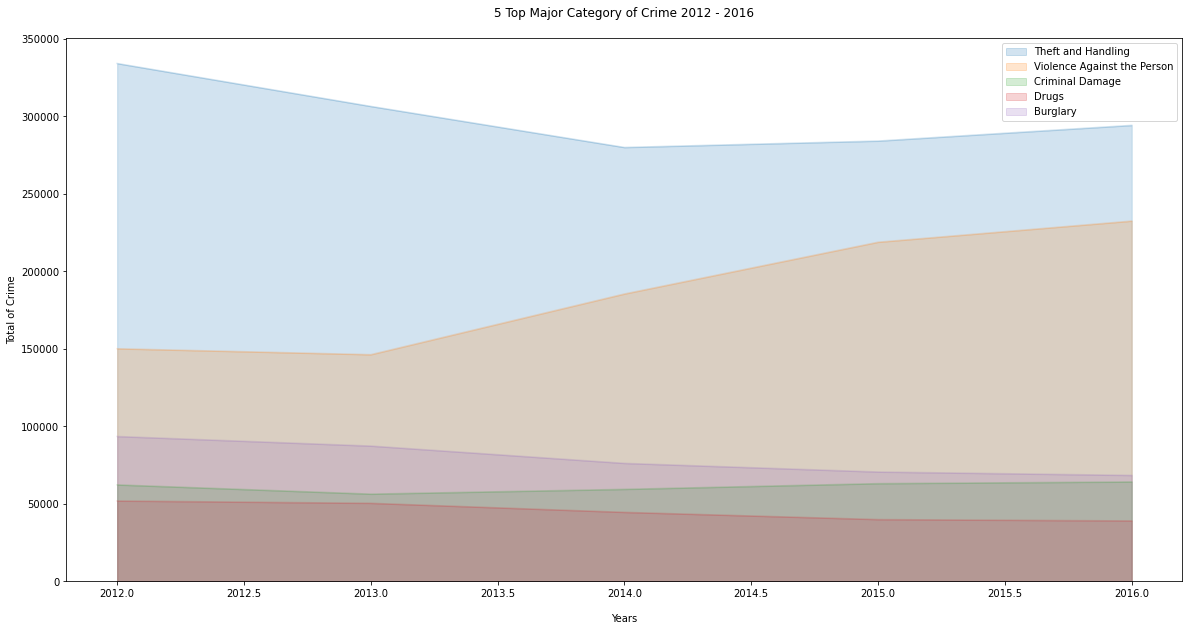

In [72]:
df5.plot(kind='area', alpha=0.20, stacked=False, figsize=(20,10))
plt.title('5 Top Major Category of Crime 2012 - 2016\n')
plt.ylabel('Total of Crime')
plt.xlabel('\nYears')
plt.show()

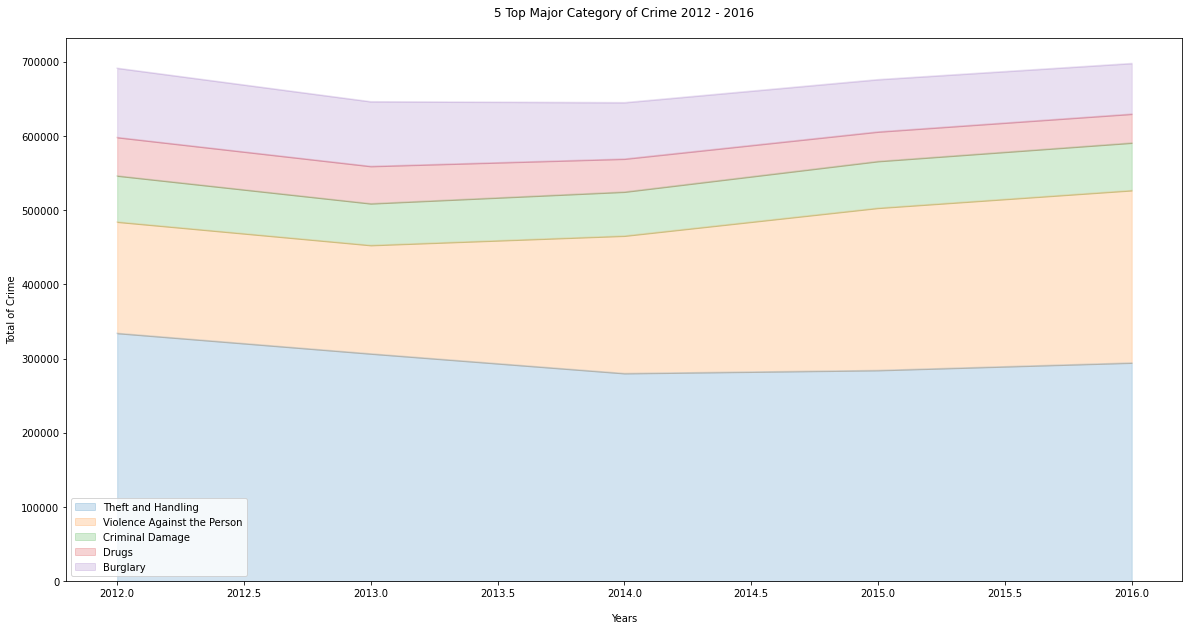

In [71]:
df5.plot(kind='area', alpha=0.20, stacked=True, figsize=(20,10))
plt.title('5 Top Major Category of Crime 2012 - 2016\n')
plt.ylabel('Total of Crime')
plt.xlabel('\nYears')
plt.show()

Berdasarkan visualisasi diatas menggunakan area plot, kita akan melihat tingkat major_crime yang terjadi sepanjang tahun 2012 hingga 2016. Theft and Handling merupakan jenis major_crime yang paling sering terjadi khususnya di tahun 2012, hal ini ditunjuukan besanya area plot untuk bagian Theft and Handling, lalu mengalami penurunan hingga pada tahun 2014, sehingga jenis kejahatan ini cenderung fluktuatif. Hal yang sama juga terjadi pada jenis major_crime Violence Against the Person dan Criminal damage. Untuk jenis major_crime Drugs and Burglary cenderung memiliki nilai yang semakin kecil tiap tahunnya, hal ini ditandai dengan bentuk area plot yang menurun dan mengecil. 

# b. Bar Chart

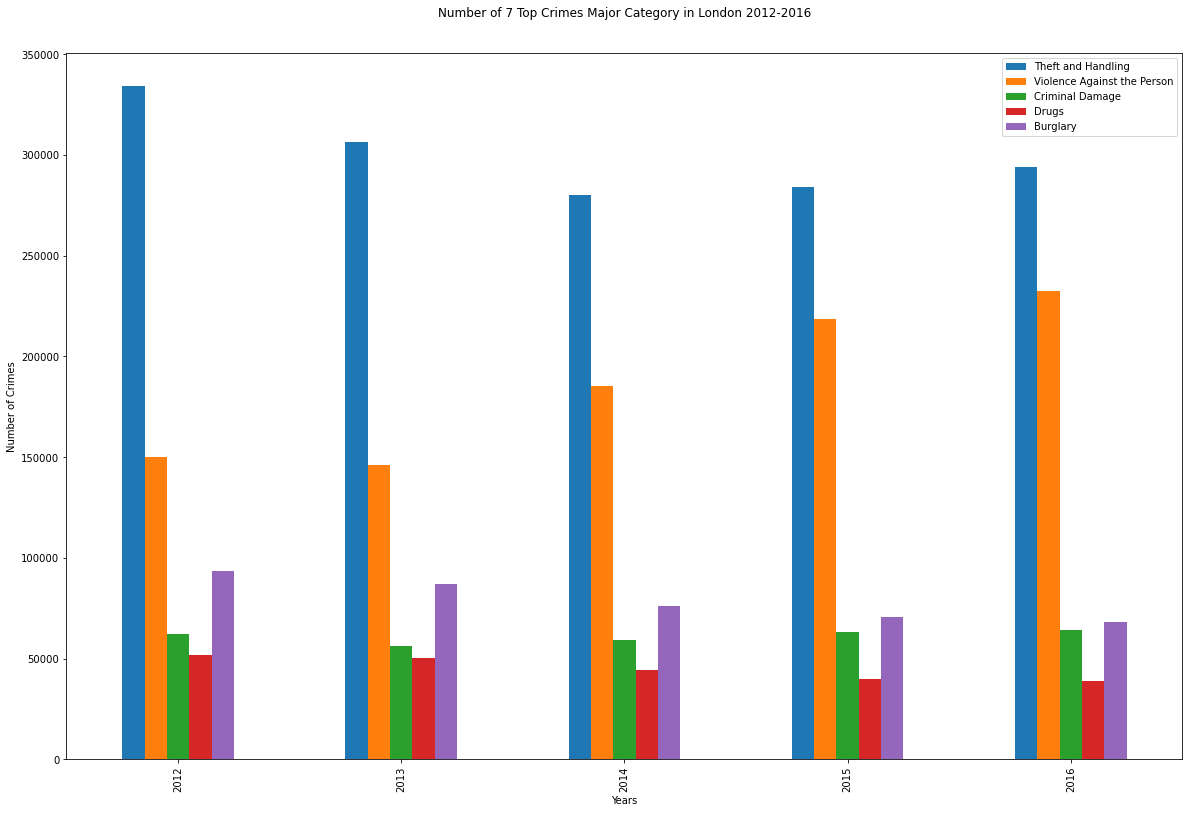

In [66]:
df5.plot(kind='bar', legend=True, figsize=(20,13))
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.title('Number of 7 Top Crimes Major Category in London 2012-2016\n\n')
plt.show()

Hal yang sama juga ditampilkan dengan Barchart. Berdasarkan barchart diatas, dapat disimpulkan bahwa tingkat major_crime terendah terjadi di tahun 2014. Lalu kita akan membuat barchart baru yang berisi jumlah major_crime yang terjadi di London pada tahun 2014.

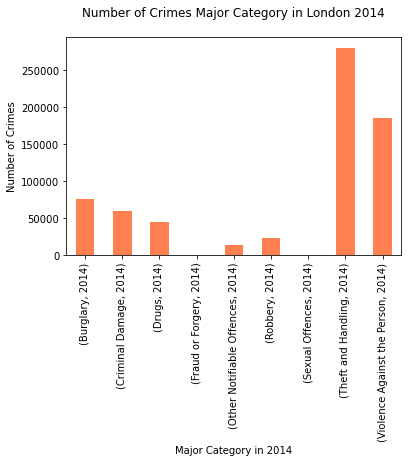

In [67]:
major_b = df[(df['year'] == 2014)].groupby(['major_category','year'])['total'].sum()
major_b.plot(kind='bar', color='coral')

plt.xlabel('Major Category in 2014')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Major Category in London 2014\n')
plt.show()

Jenis major_crime yang paling sering terjadi ialah Theft and Handling yaitu sebesar 250000 lebih, sedangkan jenis major_crime yang paling sedikit terjadi adalah Fraud or Forgery dan Sexual Offences.

# c. Line Chart

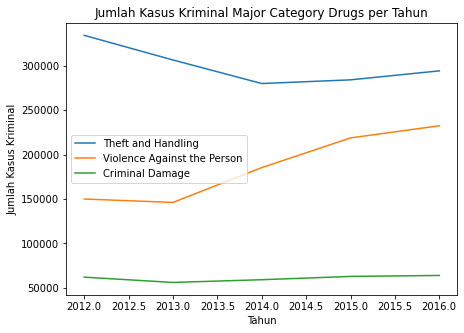

In [68]:
df3_line = pd.concat([df_thefthand, df_violence, df_crimdamage], axis=1)
df3_line.plot(kind='line', figsize=(7,5))
plt.title('Jumlah Kasus Kriminal Major Category Drugs per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus Kriminal')
plt.show()

Untuk Line chart kita akan mencoba memvisualisasikan 3 jenis major_crime terbesar yaitu Theft and Handling, Violence against the person, dan Criminal Damage. Dengan Line chart kita dapat melihat perkembangan setiap jenis major_crime tadi per tahunnya. Dari 3 jenis kejahatan yang dipilih, Violence againts the person merupakan jenis kejahatan yang mengalami kenaikan setiap tahunnya, hal ini dilihat dari bentuk line yang bergerak tajam keatas. 

# d. Histogram

In [69]:
df2_hist = pd.concat([df_drugs, df_burglary], axis=1)
df2_hist

,Drugs,Burglary
year,,
2012,51776,93392
2013,50278,87222
2014,44435,76053
2015,39785,70489
2016,38914,68285


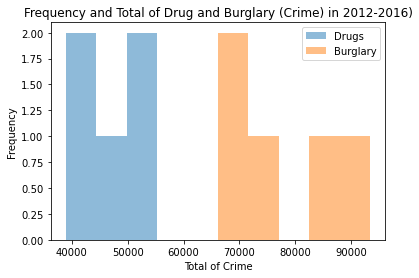

In [70]:
df2_hist.plot(kind='hist', alpha=0.50)

plt.xlabel('Total of Crime')
plt.ylabel('Frequency')
plt.title('Frequency and Total of Drug and Burglary (Crime) in 2012-2016)')
plt.show()

Histogram adalah jenis grafik yang menjelaskan frekuensi berdasarkan dua data numerik beserta frekuensi dari data-data numerik yang bersifat kontinu. Histogram di atas menampilkan persebaran 2 data yaitu Drugs dan Burglary pada tahun 2012 - 2016.
Beberapa data tersebut tersebar secara baik, sehingga dapat dilihat bahwa untuk data Drugs terdapat terdapat 1 data yang berada pada sebelum dan sesudah 40.000, 1 data yang berada pada rentang < 50.000 s.d 50.000, dan 1 data yang berada pada rentang 50.000 dan sesudah 50.000. Sedangkan data burglary memiliki frekuensi 3, 2 data pada rentang sebelum dan sesudah 70.000 dan 1 data pada sebelum dan sesudah 90.000

# e. Pie Chart

In [34]:
df_1216 = df.query('year >= 2012 and year <= 2016')
df_1216

,area,major_category,minor_category,total,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
5,Ealing,Theft and Handling,Other Theft,0,2012,5
...,...,...,...,...,...,...
13490597,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6


In [35]:
dfarea = df_1216.groupby(['area'])[['total']].sum().reset_index()

dfarea = dfarea.rename(columns={'total':'total of crime'})
dfarea

,area,total of crime
0,Barking and Dagenham,80262
1,Barnet,117375
2,Bexley,59895
3,Brent,126118
4,Bromley,99036
5,Camden,145765
6,City of London,711
7,Croydon,141791
8,Ealing,133101
9,Enfield,108904


In [36]:
dfarea = dfarea.sort_values(by=['total of crime'], ascending=False)
dfarea

,area,total of crime
32,Westminster,256367
21,Lambeth,164341
27,Southwark,152673
5,Camden,145765
24,Newham,144956
7,Croydon,141791
29,Tower Hamlets,135292
8,Ealing,133101
11,Hackney,132827
18,Islington,128855


In [37]:
dfarea_top10 = dfarea.head(10)
dfarea_top10

,area,total of crime
32,Westminster,256367
21,Lambeth,164341
27,Southwark,152673
5,Camden,145765
24,Newham,144956
7,Croydon,141791
29,Tower Hamlets,135292
8,Ealing,133101
11,Hackney,132827
18,Islington,128855


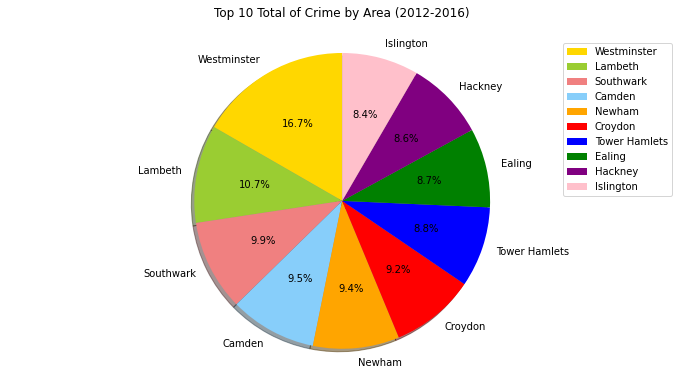

In [38]:
plt.figure(figsize=(12,6))

plt.pie(dfarea_top10['total of crime'],
        labels=dfarea_top10['area'],
        colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue',
                'orange', 'red', 'blue', 'green', 'purple', 'pink'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)


plt.title('Top 10 Total of Crime by Area (2012-2016)\n')
plt.axis('equal')
plt.legend(labels=dfarea_top10['area'])
plt.show()

Lalu terdapat Pie Chart yang akan kita gunakan untuk melihat proporsi suatu data. Seperti contoh kita akan melihat tingkat masing-masing kejahatan yang terjadi untuk setiap kota. Berdasarkan pie chart diatas, ditampilkan 10 kota dengan tingkat kejahatan terbesar beserta proporsi masing-masing kejahatannya. Kota Westminster merupakan kota dengan tingkat kriminal yang tinggi yaitu sebesar 16.7%.

# f. Boxplot

In [39]:
dfarea = df_1216.groupby(['area'])[['total']].sum()

dfarea = dfarea.rename(columns={'total':'total of crime'})
dfarea

,total of crime
area,
Barking and Dagenham,80262
Barnet,117375
Bexley,59895
Brent,126118
Bromley,99036
Camden,145765
City of London,711
Croydon,141791
Ealing,133101


In [40]:
dfarea = dfarea.sort_values(by=['total of crime'], ascending=False)
dfarea

,total of crime
area,
Westminster,256367
Lambeth,164341
Southwark,152673
Camden,145765
Newham,144956
Croydon,141791
Tower Hamlets,135292
Ealing,133101
Hackney,132827


In [41]:
dfarea_top10 = dfarea.head(10)
dfarea_top10

,total of crime
area,
Westminster,256367
Lambeth,164341
Southwark,152673
Camden,145765
Newham,144956
Croydon,141791
Tower Hamlets,135292
Ealing,133101
Hackney,132827


In [42]:
dfarea_top10.describe()

,total of crime
count,10.00000
mean,153596.80000
std,37641.68413
min,128855.00000
25%,133648.75000
50%,143373.50000
75%,150946.00000
max,256367.00000


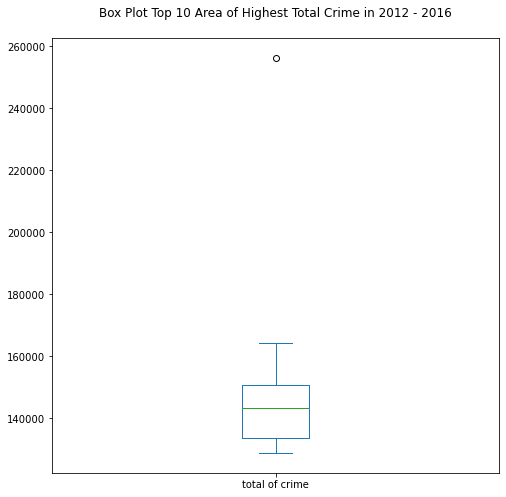

In [43]:
dfarea_top10.plot(kind='box', figsize=(8,8))
plt.title('Box Plot Top 10 Area of Highest Total Crime in 2012 - 2016\n')
plt.xlabel('')
plt.show()

Box Plot adalah visualisasi yang menggambarkan data statistik secara grafik data numerik. Hal ini untuk mengetahui kesimetrisan distribusi penyebaran data secara cepat.Box Plot memiliki beberapa informasi seperti nilai minimumm, Q1, Q2 (Median), Q3, nilai maksimum.

Berdasarkan visualisasi diatas, terdapat nilai minimum < 140.000. Nilai berada pada kisaran 120.000. Pada garis kedua terbawah gambar di atas menggambarkan Q1 atau kuatil terendah berkisar nilai > 130.000. Garis ketiga yang berada pada tengah-tengah merupakan garis Q2 (Median) yang berkisar pada nilai 140.000-an. Garis kedua teratas pada gambar visualisasi menggambarkan kuartil tertinggi dari informasi statistik (Q3). Garis teratas merupakan visualisasi dari nilai max data yang telah dikalkulasi secara otomatis oleh library. Terdapat Outlier pada visualisasi ini, Outlier adalah data yang menyimpang secara ekstrim dari rata-rata kumpulan data. Outlier berada pada sekitar nilai > 250.000.

# g. Scatter Plot

Kemudian melihat hubungan antar variabel dengan scatter plot. Disini akan dilihat hubungan antara wilayah westminster yang merupakan wilayah dengan kejahatan terbesar dari tahun 2012- 2016 dengan tahun

In [44]:
ar = df[(df['year'] >= 2012)].groupby(['area','year'])['total'].sum()
ar

area                  year
Barking and Dagenham  2012    15990
                      2013    15759
                      2014    15426
                      2015    16346
                      2016    16741
                              ...  
Westminster           2012    59226
                      2013    53852
                      2014    47564
                      2015    47395
                      2016    48330
Name: total, Length: 165, dtype: int64

In [45]:
#Mengelompokkan wilayah westminter dan menghitung total kejahatan berdasarkan tahun 
westminster = ar['Westminster']
df_westminster = westminster.to_frame()
df_westminster.rename(columns={'total':'Westminster'}, inplace = True)
df_westminster

,Westminster
year,
2012,59226
2013,53852
2014,47564
2015,47395
2016,48330


In [46]:
df_westminster.reset_index(inplace=True)
df_westminster

,year,Westminster
0,2012,59226
1,2013,53852
2,2014,47564
3,2015,47395
4,2016,48330


Text(0.5, 1.0, 'Scatter Plot Westminster ')

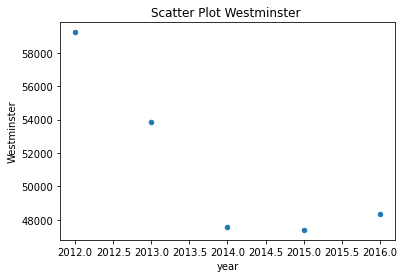

In [47]:
df_westminster.plot(kind='scatter', x='year', y='Westminster')
plt.title("Scatter Plot Westminster ")

Scatter Plot berfungsi sebagai alat visualisasi yang menemukan pola antar 2 variabel. Pada plot di atas tidak ditemukan hubungan yang signifikan antara 2 variabel tersebut. Sehingga dapat disimpulkan bahwa keterkaitannya rendah.

# h. Word Clouds

In [48]:
area = df['area'].astype(str).tolist()
text = ' '.join(area)
wordcloud = WordCloud(width = 1200, height = 1000, background_color = 'white').generate(text)

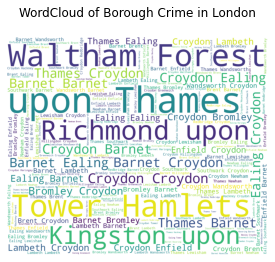

In [49]:
plt.imshow(wordcloud)
plt.title('WordCloud of Borough Crime in London\n')

plt.axis("off")
plt.show()

Jenis visualisasi wordcloud digunakan untuk menampilkan kata yang paling sering muncul pada dataset hal ini ditandai dengan ukuran kata yang ditampilkan semakin besar. Dapat dilihat bahwa wilayah yang paling banyak datanya adalah Upon Thames, Richmons Upon, Waltham Forest. Namun kata pada wordcloud ini bukan wilayah dengan kejahatan terbanyak, tetapi juga meliputi wilayah dengan total kejahatan 0 setiap tahunnya.

# i. Folium Maps

Jenis visualisasi terakhir adalah folium maps. Folium maps digunakan untuk memetakan data yang berupa kota dalam bentuk sebuah peta/maps. Kita akan coba memetakan kota yang terdapat di Inggris dalam bentuk maps.

In [50]:
london_folium = folium.Map(location=[51.5072, -0.1275], zoom_start = 10, tiles='Stamen Terrain')
london_folium